# Statistic Language

Download a dataset, it contains many english books in a tokenized format

In [19]:
import nltk
nltk.download("book")

from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

## Analize text

In [20]:
#from the frist book [text1] obtain first ten tokens to observe the format 

print("The tokens include []")
print(text1.tokens[:10])
print("\nNumber of tokens: {}".format(len(text1)))

The tokens include []
['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.']

Number of tokens: 260819


### Measure lexical richness

$R_l = \frac{total \space de \space palabras \space unicas}{total \space de \space palabras} = \frac{Longitud \space vocabulario}{longitud \space texto}$

In [21]:
#Set function maintain unique values 
vocabulary = sorted(set(text1))
print(vocabulary[1000:1010])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts']


In [22]:
#metric lexical richness

rl = len(vocabulary) / len(text1)
print("Metric lexical richness of moby dick book: {}".format(rl))

Metric lexical richness of moby dick book: 0.07406285585022564


In [23]:
def metric_lexical_richness(text):
  vocabulary = set(text)
  rl = len(vocabulary) / len(text)
  return rl

def word_percentage(word, text):
  return 100 * text.count(word) / len(text)

In [24]:
print("Lexic Richness: {}".format(metric_lexical_richness(text1)))
word = "monster"
print("The percentage of the word {} is: {}".format(word, word_percentage(word, text1)))


Lexic Richness: 0.07406285585022564
The percentage of the word monster is: 0.018786974875296663


## Statistical language

the simplest statistical calculations that can be performed on a text or a corpus are about the distribution of words

* Build a dictionary with the word distribution
* e.g. `dic = {"monster":49, "boat":54}`

In [ ]:
dic = {}

for word in set(text1):
  dic[word] = text1.count(word)

print(dic)

{'prophet': 13, 'Squall': 2, 'herded': 1, 'Johnson': 3, 'chick': 1, '!)': 3, 'dares': 1, 'alcoves': 2, 'ADVENTURES': 1, 'layers': 3, 'Insurance': 2, 'observers': 1, 'funereally': 1, 'rioting': 1, 'uneven': 1, 'revery': 1, 'SAMUEL': 2, 'sheath': 4, 'potentially': 1, 'ghostliness': 2, 'trustworthy': 2, 'calves': 5, 'fascinated': 2, 'slide': 10, 'uncorking': 1, 'ancient': 28, 'nt': 1, 'weight': 17, 'dazed': 1, 'persecutions': 1, 'shouldering': 1, 'Plain': 1, 'pennoned': 1, 'Equatorial': 2, 'whaleman': 44, 'adding': 3, 'sheaf': 1, 'onsets': 1, 'omens': 2, 'mystery': 9, 'stampedoes': 1, 'classify': 1, 'boots': 14, 'Led': 1, 'casual': 2, 'Evangelist': 1, 'midway': 5, 'bedraggled': 1, '800': 3, 'sidelong': 7, 'another': 106, 'Her': 3, 'panellings': 1, 'goodly': 2, 'walks': 4, 'formed': 22, 'sharpen': 2, 'desirable': 3, 'avocation': 2, 'interlude': 4, 'Mayhew': 8, 'considering': 28, 'possibly': 29, 'say': 237, 'womb': 1, 'liveliness': 2, 'plying': 3, 'poverty': 1, 'Paris': 1, 'strangest': 3, '

## FreqDist Method

A frequency distribution for the outcomes of an experiment. A frequency distribution records the number of times each outcome of an experiment has occurred. For example, a frequency distribution could be used to record the frequency of each word type in a document. Formally, a frequency distribution can be defined as a function mapping from each sample to the number of times that sample occurred as an outcome.

In [27]:
#nltk includes function to processing the text

fdist = FreqDist(text1)
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

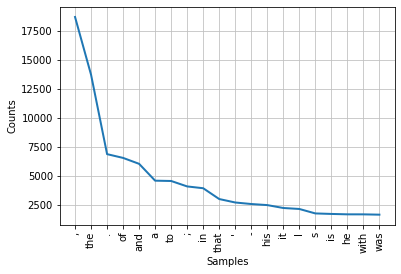

The numbers of repeated word monster is: 49


In [28]:
#Plot the frecuency distribution of each word

fdist.plot(20)

#This is a dictionary type, so we can pass the key of any wors and see number
print("The numbers of repeated word monster is: {}".format(fdist["monster"]))

## Filter Distribution

* There are many words in the text that do not provide relevant information
* Filter the relevant words for the analize text stage

In [30]:
#Filter: 1
#   Select the words with a leg greater than 5 letters
long_words = [word for word in text1 if len(word) > 5]
long_words

['Herman',
 'Melville',
 'ETYMOLOGY',
 'Supplied',
 'Consumptive',
 'Grammar',
 'School',
 'threadbare',
 'dusting',
 'lexicons',
 'grammars',
 'handkerchief',
 'mockingly',
 'embellished',
 'nations',
 'grammars',
 'somehow',
 'mildly',
 'reminded',
 'mortality',
 'school',
 'others',
 'called',
 'tongue',
 'leaving',
 'through',
 'ignorance',
 'letter',
 'almost',
 'maketh',
 'signification',
 'deliver',
 'HACKLUYT',
 'animal',
 'roundness',
 'rolling',
 'arched',
 'vaulted',
 'WEBSTER',
 'DICTIONARY',
 'immediately',
 'WALLEN',
 'wallow',
 'RICHARDSON',
 'DICTIONARY',
 'DANISH',
 'SWEDISH',
 'ICELANDIC',
 'ENGLISH',
 'BALEINE',
 'FRENCH',
 'BALLENA',
 'SPANISH',
 'ERROMANGOAN',
 'EXTRACTS',
 'Supplied',
 'Librarian',
 'painstaking',
 'burrower',
 'appears',
 'through',
 'Vaticans',
 'street',
 'stalls',
 'picking',
 'whatever',
 'random',
 'allusions',
 'whales',
 'anyways',
 'whatsoever',
 'sacred',
 'profane',
 'Therefore',
 'higgledy',
 'piggledy',
 'statements',
 'however',
 'au

Other form of organize the distribution word in a text is through tuples 

* `fdist_filter = [("account", 2), ("advancing", 5), ...]`

This can be transferred to a numpy array to perform the word distribution.

1. `f_dist_filter = np.array(f_dist_filter, *args)`
2. `np.sort(f_dist_filter, *args) = [("account", 2), ("advancing", 5), ...]`

In [31]:
#Filter 2, delete the words if it is repeated great than 10

interest_words = [(word, fdist[word]) for word in set(text1) if len(word) > 5 and fdist[word] > 10]
interest_words

[('prophet', 13),
 ('ancient', 28),
 ('weight', 17),
 ('whaleman', 44),
 ('another', 106),
 ('formed', 22),
 ('considering', 28),
 ('possibly', 29),
 ('looked', 64),
 ('Nevertheless', 27),
 ('swinging', 13),
 ('especially', 44),
 ('belonged', 13),
 ('baleen', 11),
 ('swallowed', 13),
 ('behind', 50),
 ('battle', 29),
 ('considerable', 26),
 ('important', 19),
 ('question', 29),
 ('peculiar', 56),
 ('Daggoo', 34),
 ('unknown', 36),
 ('shoulder', 12),
 ('perceived', 14),
 ('stroke', 16),
 ('steadily', 11),
 ('glancing', 12),
 ('striking', 23),
 ('dragged', 16),
 ('locked', 16),
 ('frequently', 14),
 ('lightning', 26),
 ('descried', 22),
 ('touching', 45),
 ('thousands', 16),
 ('number', 25),
 ('intent', 14),
 ('bursting', 12),
 ('letter', 12),
 ('motions', 12),
 ('thought', 149),
 ('scuttle', 22),
 ('common', 48),
 ('deadly', 22),
 ('wooden', 26),
 ('entire', 55),
 ('quantity', 13),
 ('orders', 24),
 ('feeling', 28),
 ('simultaneously', 14),
 ('crossing', 16),
 ('escape', 24),
 ('chains'

In [39]:

dtypes = [("word", "S10"), ("frequency", int)]
interest_words = np.array(interest_words, dtype = dtypes)
interest_words

array([(b'prophet',  13), (b'ancient',  28), (b'weight',  17),
       (b'whaleman',  44), (b'another', 106), (b'formed',  22),
       (b'considerin',  28), (b'possibly',  29), (b'looked',  64),
       (b'Neverthele',  27), (b'swinging',  13), (b'especially',  44),
       (b'belonged',  13), (b'baleen',  11), (b'swallowed',  13),
       (b'behind',  50), (b'battle',  29), (b'considerab',  26),
       (b'important',  19), (b'question',  29), (b'peculiar',  56),
       (b'Daggoo',  34), (b'unknown',  36), (b'shoulder',  12),
       (b'perceived',  14), (b'stroke',  16), (b'steadily',  11),
       (b'glancing',  12), (b'striking',  23), (b'dragged',  16),
       (b'locked',  16), (b'frequently',  14), (b'lightning',  26),
       (b'descried',  22), (b'touching',  45), (b'thousands',  16),
       (b'number',  25), (b'intent',  14), (b'bursting',  12),
       (b'letter',  12), (b'motions',  12), (b'thought', 149),
       (b'scuttle',  22), (b'common',  48), (b'deadly',  22),
       (b'wooden

In [40]:
import numpy as np

In [41]:
interest_words = np.sort(interest_words, order = "frequency")
interest_words

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

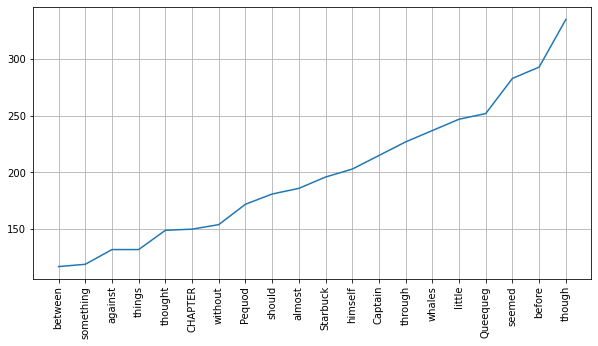

In [43]:
top_words = 20
x = np.arange(len(interest_words[-top_words:]))
y = [freq[1] for freq in interest_words[-top_words:]]
plt.figure(figsize = (10, 5))
plt.plot(x, y)
plt.xticks(x, [freq[0].decode("utf-8") for freq in interest_words[-top_words:]], rotation = "vertical")
plt.grid(True)
plt.show()